In [1]:
import pandas as pd
import numpy as np


# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind

# INDEX

[EDA Part 2 and Data Preprocessing](#DataPrep)


- [Part 2: EDA](#EDA2)
- [Preprocessing](#Prep)
<a id='INDEX'></a>

## EDA Part 2 <a id='EDA2'></a>

### Question of interest

The task to investigate the association among all categorial features and get some insight: 

* How different personality type, education background, age group, location are associated with each other.
* How different class of drugs are associated based on their usage.

In [2]:
# Loading the cleaned dataset

df = pd.read_csv('drug_consumption_mapped.csv')


# Dropping 'Ethnicity' from the dataset due to ethical reason
df = df.drop(['Ethnicity','Unnamed: 0','ID'], axis=1)

In [3]:
# Describing the size of the dataframe
df.shape

(1885, 32)

In [4]:
#Dropping the 'Na' values
df = df.dropna()

#Converting 'Oscore' into datatype int
df['Oscore'] = df['Oscore'].astype(int)

In [6]:
# Display the top n number of rows
pd.set_option('display.max_columns', None)

In [7]:
# Select non-numeric columns
categorical_features = ['Age','Gender','Education','Country','Alcohol','Amphet','Amyl','Benzos',
                        'Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD',
                        'Meth','Mushrooms','Nicotine','Semer','VSA']

In [8]:
# Chi-Square Test
# Initialize a list to store results
chi2_results = []

# Perform chi-square test for each pair of features
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]

        # Create contingency table
        cross_tab = pd.crosstab(df[feature1], df[feature2])
       
        # Run chi-square test
        chi2, p, dof, expected = chi2_contingency(cross_tab)

        # Store the results
        chi2_results.append({
            'Feature 1': feature1,
            'Feature 2': feature2,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected 
        })
        

        
# Convert results to DataFrame for better readability
chi2_results_df = pd.DataFrame(chi2_results)

# Sort the results by p-value
chi2_results_df = chi2_results_df.sort_values(by='p-value')

# Filter results for significant p-values (e.g., p < 0.05)
significant_results = chi2_results_df[chi2_results_df['p-value'] < 0.05].T 

# Print the most significant results
print(significant_results)


                                                                    239  \
Feature 1                                                           LSD   
Feature 2                                                     Mushrooms   
Chi2                                                        2125.672389   
p-value                                                             0.0   
Degrees of Freedom                                                   36   
Expected Frequencies  [[28.509646302250804, 0.5509110396570204, 35.3...   

                                                                    188  \
Feature 1                                                          Coke   
Feature 2                                                       Ecstasy   
Chi2                                                        1476.107083   
p-value                                                             0.0   
Degrees of Freedom                                                   36   
Expected Frequencies  [[

There are so many features in this dataset and many strong association between the various features so hard to list them all down and go through them , so here I am trying to list down top 10 stronger associations based on theri p-value.


#### Feature 1: LSD, Feature 2: Mushrooms
* p-value: 0.0
* Interpretation: There is a very strong association between the use of LSD and Mushrooms. The p-value is extremely low, indicating that it's highly unlikely that this association is due to random chance.

#### Feature 1: Coke, Feature 2: Ecstasy 
* p-value: 0.0
* Interpretation: There is a very strong association between the use of Coke and Ecstasy. The extremely low p-value suggests a significant relationship between these two features.

#### Feature 1: Amphet, Feature 2: Coke
* p-value: 0.0
* Interpretation: There is a significant association between the use of Amphetamines and Coke. The p-value indicates this relationship is unlikely to be due to chance.

#### Feature 1: Ecstasy, Feature 2: LSD
* p-value: 0.0
* Interpretation: The use of Ecstasy and LSD are strongly associated. The p-value of 0.0 shows a highly significant relationship.

#### Feature 1: Amphet, Feature 2: Ecstasy
* p-value: 0.0
* Interpretation: There is a significant relationship between the use of Amphetamines and Ecstasy, supported by the very low p-value.

#### Feature 1: Crack, Feature 2: Heroin
* p-value: 0.0
* Interpretation: The use of Crack and Heroin are strongly associated. The p-value indicates a highly significant relationship.

#### Feature 1: Ecstasy, Feature 2: Mushrooms
* p-value: 0.0
* Interpretation: There is a significant association between the use of Ecstasy and Mushrooms. The p-value shows a strong relationship unlikely to be due to chance.

#### Feature 1: Cannabis, Feature 2: Nicotine
* p-value: 0.0
* Interpretation: The use of Cannabis and Nicotine are significantly associated. The p-value indicates a very strong relationship between these features.

#### Feature 1: Heroin, Feature 2: Meth
* p-value: 0.0
* Interpretation: There is a significant relationship between the use of Heroin and Meth. The p-value of 0.0 indicates a very strong association.

#### Feature 1: Cannabis, Feature 2: Ecstasy
* p-value: 0.0
* Interpretation: The use of Cannabis and Ecstasy are strongly associated. The p-value suggests a highly significant relationship between these features.

### Summary
The above interpretations show that the lowest p-values (< 0.05) are all associated with strong relationships between pairs of features. A p-value of 0.0 (or very close to 0) indicates that the association between these pairs is highly significant, meaning it is very unlikely that these associations are due to random chance. The features with the lowest p-values often indicate a strong dependence or relationship, which could be due to various factors, such as similar user demographics, concurrent usage, or other related behaviors. These insights can help in understanding the data better and can guide further analysis or interventions based on the observed associations.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1866 non-null   object 
 1   Gender           1866 non-null   object 
 2   Education        1866 non-null   object 
 3   Country          1866 non-null   object 
 4   Nscore           1866 non-null   int64  
 5   Escore           1866 non-null   int64  
 6   Oscore           1866 non-null   int64  
 7   Ascore           1866 non-null   int64  
 8   Cscore           1866 non-null   int64  
 9   Impulsive        1866 non-null   float64
 10  SS               1866 non-null   float64
 11  Alcohol          1866 non-null   object 
 12  Amphet           1866 non-null   object 
 13  Amyl             1866 non-null   object 
 14  Benzos           1866 non-null   object 
 15  Caff             1866 non-null   object 
 16  Cannabis         1866 non-null   object 
 17  Choc             18

In [10]:
df_num = ['Nscore','Escore','Oscore','Ascore','Cscore'] #,'Impulsive','SS'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

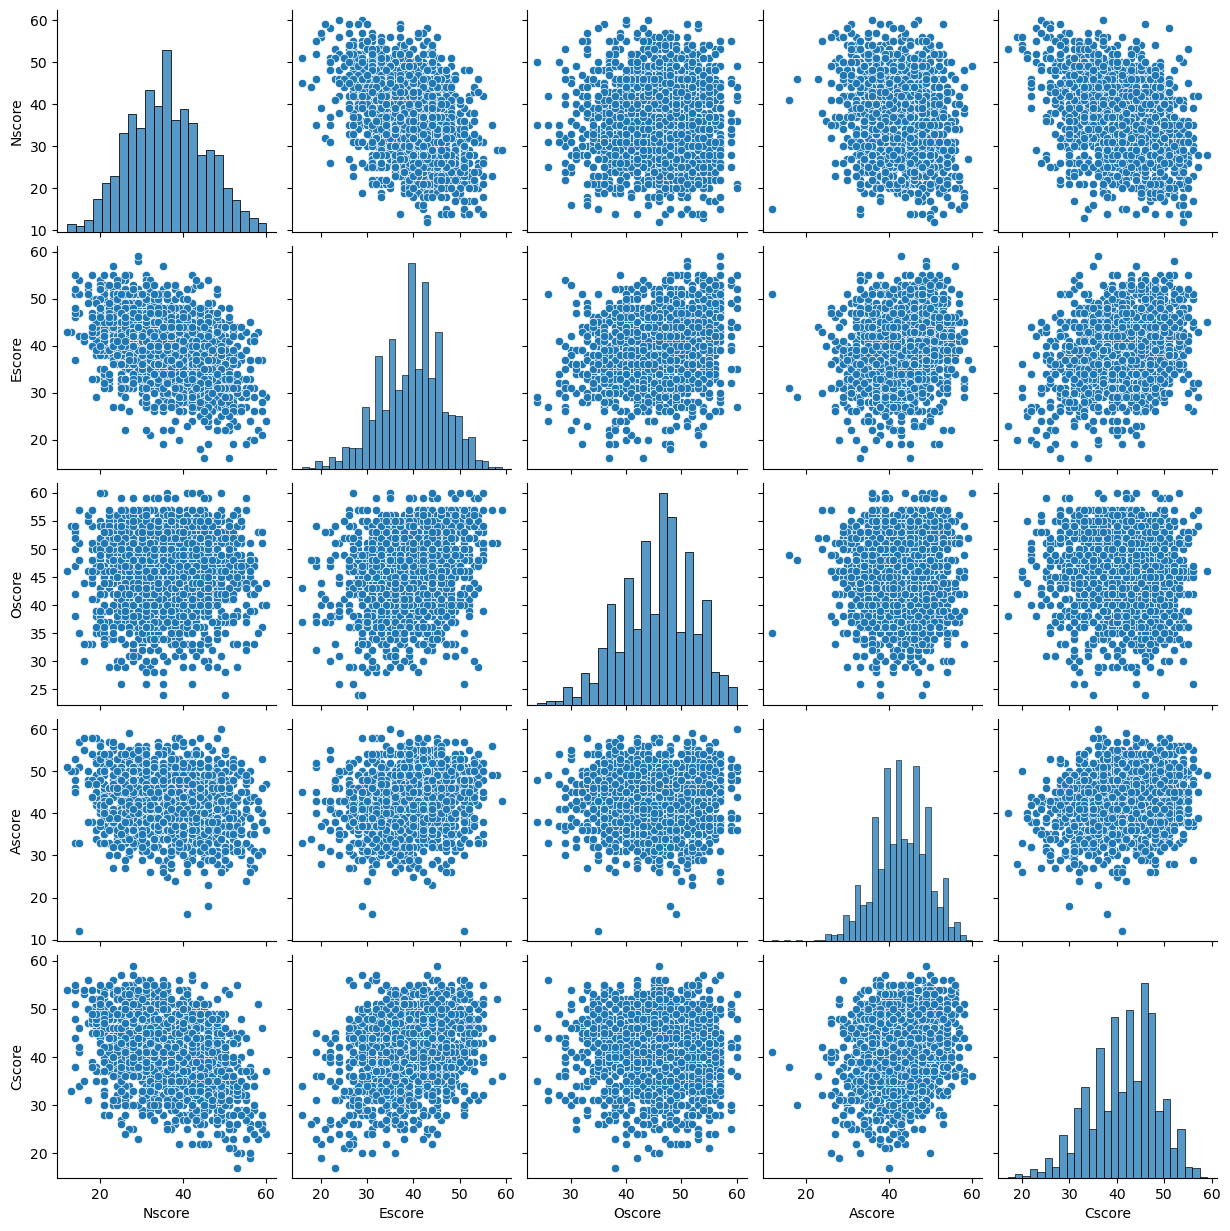

In [11]:
# pairplot to investigate correlation between the features

sns.pairplot(df[df_num])
plt.show()

From the above pairplots, some of the observations can me made like downward-sloping line indicating a negative correlation between `Nscore` and `Escore`, and `Nscore` and `Cscore` while upward-slopping line between `Cscore` and `Escore` indicating positive correlation. While `Oscore` and `Ascore` don't form any particular slope line which indicates little to no correlation between the features. 

In [12]:
# TTest Test
# Initialize a list to store results
ttest_results = []

# Perform ttest for each pair of features
for i in range(len(df_num)):
    for j in range(i + 1, len(df_num)):
        feature1 = df_num[i]
        feature2 = df_num[j]
        # Create contingency table
        cross_tab = pd.crosstab(df[feature1], df[feature2])
        
        t_stat, p_val = ttest_ind(df[feature1], df[feature2])

        # Store the results
        ttest_results.append({
            'Feature 1': feature1,
            'Feature 2': feature2,
            't_stat': t_stat,
            'p_value': p_val 
            })

# Convert results to DataFrame for better readability
ttest_results_df = pd.DataFrame(ttest_results)

# Sort the results by p-value
ttest_results_df = ttest_results_df.sort_values(by='p_value')


# Print the most ttest results
print(ttest_results_df)





  Feature 1 Feature 2     t_stat        p_value
1    Nscore    Oscore -37.487876  2.644928e-261
4    Escore    Oscore -28.066492  2.022139e-157
2    Nscore    Ascore -26.938618  3.313238e-146
3    Nscore    Cscore -20.804089   4.870403e-91
8    Oscore    Cscore  18.998052   6.787511e-77
5    Escore    Ascore -15.449998   3.034610e-52
0    Nscore    Escore -13.765399   4.327578e-42
7    Oscore    Ascore  13.008227   7.236627e-38
6    Escore    Cscore  -8.480244   3.194454e-17
9    Ascore    Cscore   6.533300   7.303510e-11


### Interpretation of Results:

- t_stat: The t-statistic value for the comparison. A higher absolute value indicates a stronger effect.
- p_value: The p-value associated with the t-statistic. A lower p-value indicates a higher statistical significance.

#### Key Findings
- Significant Negative Relationships:

    -  Nscore and Oscore: Very strong negative relationship (t_stat = -37.49, p < 0.001).
    -  Escore and Oscore: Strong negative relationship (t_stat = -28.07, p < 0.001).
    -  Nscore and Ascore: Strong negative relationship (t_stat = -26.94, p < 0.001).
    -  Nscore and Cscore: Negative relationship (t_stat = -20.80, p < 0.001).
    -  Escore and Ascore: Negative relationship (t_stat = -15.45, p < 0.001).
    -  Nscore and Escore: Negative relationship (t_stat = -13.77, p < 0.001).
    -  Escore and Cscore: Negative relationship (t_stat = -8.48, p < 0.001).

- Significant Positive Relationships:

    - Oscore and Cscore: Strong positive relationship (t_stat = 18.99, p < 0.001).
    - Oscore and Ascore: Positive relationship (t_stat = 13.01, p < 0.001).
    - Ascore and Cscore: Positive relationship (t_stat = 6.53, p < 0.001).

#### Conclusion

The results indicate several significant relationships between personality features:

- Neuroticism (Nscore) shows strong negative correlations with Openness (Oscore), Agreeableness (Ascore), Conscientiousness (Cscore), and Extraversion (Escore), suggesting that individuals with higher neuroticism tend to have lower scores in these other personality traits.
- Extraversion (Escore) is negatively correlated with Openness (Oscore), Agreeableness (Ascore), and Conscientiousness (Cscore), indicating that higher extraversion is associated with lower scores in these traits.
- Openness (Oscore) has strong positive correlations with Conscientiousness (Cscore) and Agreeableness (Ascore), suggesting that individuals with higher openness tend to score higher on these traits.
- Agreeableness (Ascore) and Conscientiousness (Cscore) are positively correlated, indicating that more agreeable individuals tend to be more conscientious.







## Preprocessing <a id='Prep'></a>

In [13]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Impulsive_class,SS_class
0,35 - 44,Female,Professional Certificate/ Diploma,UK,39,36,42,37,42,-0.21712,-1.18084,Last Week,Last Decade,Never,Last Decade,Last Day,Never,Last Week,Never,Never,Never,Never,Never,Never,Never,Never,Never,Last Decade,Never,Never,Average,Low
1,25 - 34,Male,Doctorate Degree,UK,29,52,55,48,41,-0.71126,-0.21575,Last Week,Last Decade,Last Decade,Never,Last Day,Last Month,Last Day,Last Year,Never,Last Month,Never,Last Decade,Never,Last Decade,Last Year,Never,Last Month,Never,Never,Average,Average
2,35 - 44,Male,Professional Certificate/ Diploma,UK,31,45,40,32,34,-1.37983,0.40148,Last Day,Never,Never,Never,Last Day,Last Year,Last Month,Never,Never,Never,Never,Never,Never,Never,Never,Decade Ago,Never,Never,Never,Moderate,Average
3,18 - 24,Female,Masters Degree,UK,34,34,46,47,46,-1.37983,-1.18084,Last Month,Never,Never,Last Year,Last Week,Last Decade,Last Month,Last Decade,Never,Never,Never,Last Decade,Never,Never,Never,Never,Last Decade,Never,Never,Moderate,Low
4,35 - 44,Female,Doctorate Degree,UK,43,28,43,41,50,-0.21712,-0.21575,Last Month,Decade Ago,Decade Ago,Never,Last Day,Last Year,Last Day,Never,Never,Decade Ago,Never,Never,Decade Ago,Never,Never,Last Decade,Last Decade,Never,Never,Average,Average


In [14]:
# Mapping all the drug types columns values to more readable values, 
#I am only considering people who have consumed drugs within last month

List_of_Columns = df[df.columns[11:30]]

for col in List_of_Columns:
    df[col] = df[col].map({
            'Never':0,
            'Decade Ago':0,
            'Last Decade':0,
            'Last Year':0,
            'Last Month':1,
            'Last Week':1,
            'Last Day':1
            }).astype(int)


/var/folders/dt/kb7yntdd6xn3l8t786zh4cv00000gn/T/ipykernel_1654/4084769738.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(index))
/var/folders/dt/kb7yntdd6xn3l8t786zh4cv00000gn/T/ipykernel_1654/4084769738.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(grouped_data.index, rotation=15)
/var/folders/dt/kb7yntdd6xn3l8t786zh4cv00000gn/T/ipykernel_1654/4084769738.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(grouped_data.index, rotation=15)
/var/folders/dt/kb7yntdd6xn3l8t786zh4cv00000gn/T/ipykernel_1654/4084769738.py:24: UserWarning: set_ticklabels() should only be

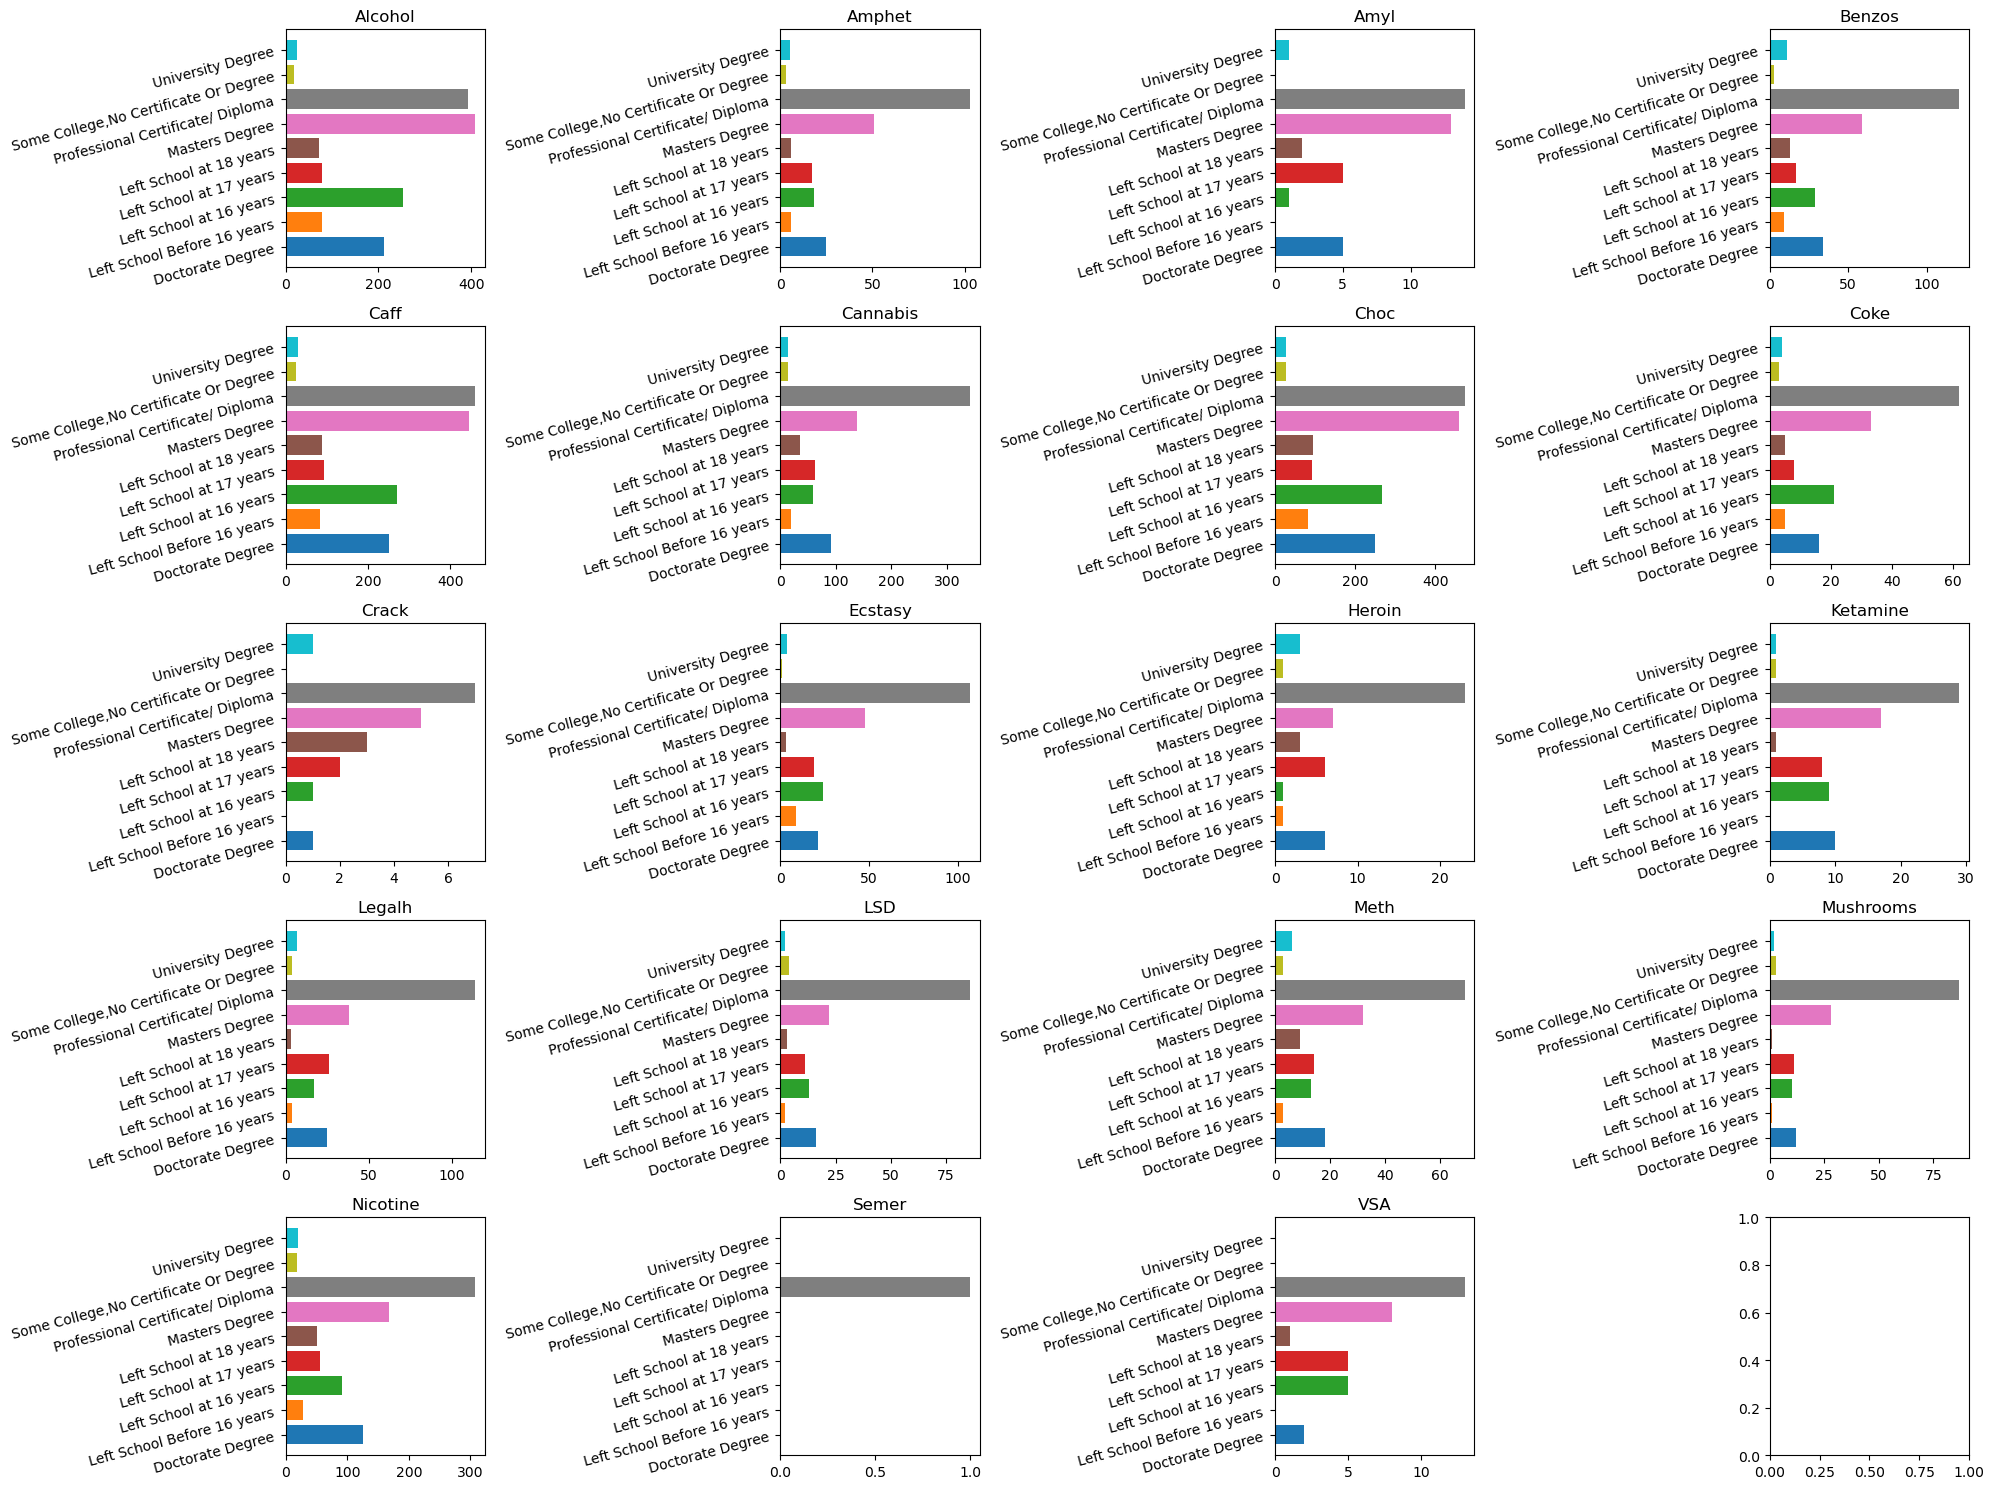

In [33]:

import matplotlib.pyplot as plt
import matplotlib
#Using subplots is the better way to visualize multiple features
# Create the subplots
fig, axs = plt.subplots(5, 4, figsize=(20, 15))

index = df['Education'].unique()
#colors = matplotlib.colormaps.get_cmap(index)
colors = plt.cm.get_cmap('tab10', len(index))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(List_of_Columns):
    ax = axs[i]  # Access the subplot axes
    grouped_data = df.groupby('Education')[col].sum().sort_index()
    color_dict = {edu: colors(j) for j, edu in enumerate(index)}
    
    # Plotting each education level with its corresponding color
    for edu in index:
        ax.barh(edu, grouped_data[edu], color=color_dict[edu])
    
    ax.set_title(f'{col}')
    ax.set_yticklabels(grouped_data.index, rotation=15)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

Based on the analysis of drug usage broken down by educational attainment, it is evident that individuals with a `Professional Certificate/Diploma` have a higher rate of drug consumption compared to other educational groups. This trend is consistent across multiple drug types, indicating a significant correlation between having a `Professional Certificate/Diploma` and increased drug usage.

/var/folders/dt/kb7yntdd6xn3l8t786zh4cv00000gn/T/ipykernel_58155/2734178392.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(index))


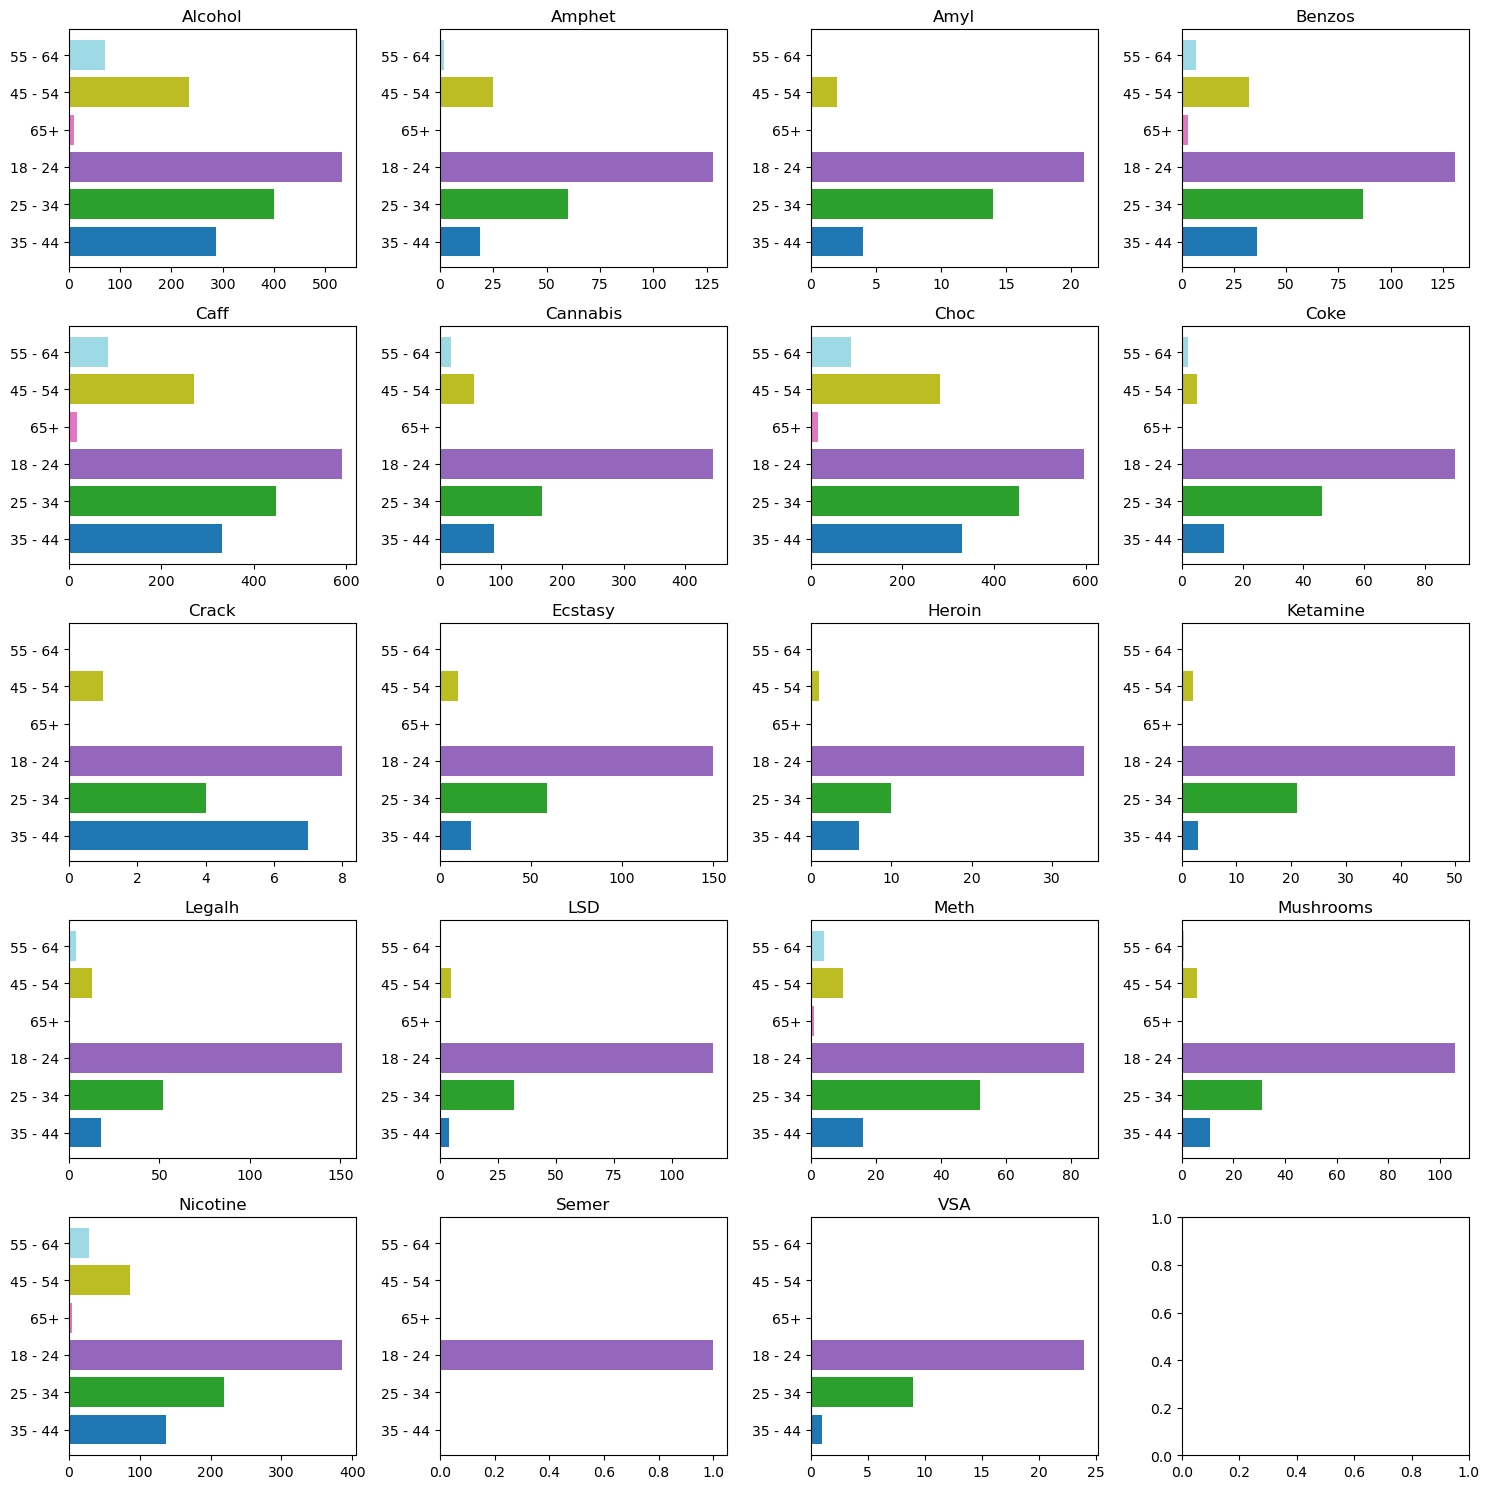

In [48]:

#Using subplots is the better way to visualize multiple features
# Create the subplots
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

index = df['Age'].unique()
colors = plt.cm.get_cmap('tab20', len(index))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, col in enumerate(List_of_Columns):
    ax = axs[i]  # Access the subplot axes
    grouped_data = df.groupby('Age')[col].sum().sort_index()
    color_dict = {edu: colors(j) for j, edu in enumerate(index)}
    
    # Plotting each education level with its corresponding color
    for edu in index:
        ax.barh(edu, grouped_data[edu], color=color_dict[edu])
    
    ax.set_title(f'{col}')
    #ax.legend(index, title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

Based on the analysis of drug usage broken down by Age group, it is evident that individuals in the age group `18 - 24` \have a higher rate of drug consumption followed by `25 - 34` compared to other age groups. This trend is consistent across multiple drug types, indicating a significant correlation between having a young adults and increased drug usage.

In [17]:
# Convert categorical columns to dummy variables
dummies_1 = pd.get_dummies(df['Gender'], prefix='Gender')
dummies_2 = pd.get_dummies(df['Education'], prefix='Education')
dummies_3 = pd.get_dummies(df['Age'], prefix='Age')
dummies_4 = pd.get_dummies(df['Country'], prefix='Country')

# Join the dummy variables with the original DataFrame
ddf = df.drop(['Gender', 'Education', 'Age', 'Country'], axis=1) \
                    .join(dummies_1) \
                    .join(dummies_2) \
                    .join(dummies_3) \
                    .join(dummies_4)

# Display the updated DataFrame
ddf.head()



,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Impulsive_class,SS_class,Gender_Female,Gender_Male,Education_Doctorate Degree,Education_Left School Before 16 years,Education_Left School at 16 years,Education_Left School at 17 years,Education_Left School at 18 years,Education_Masters Degree,Education_Professional Certificate/ Diploma,"Education_Some College,No Certificate Or Degree",Education_University Degree,Age_18 - 24,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_55 - 64,Age_65+,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,39,36,42,37,42,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Average,Low,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,29,52,55,48,41,-0.71126,-0.21575,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,Average,Average,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,31,45,40,32,34,-1.37983,0.40148,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Moderate,Average,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,34,34,46,47,46,-1.37983,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Moderate,Low,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,43,28,43,41,50,-0.21712,-0.21575,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Average,Average,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [18]:
# Assigning the actual Impulsive_class value to the dummies
ddf['Impulsive'] = ddf['Impulsive_class'].map({'Very Low':0,
                                       'Moderate':0,
                                       'Average':0,
                                       'Very High':1,
                                       'High':1
                            }).astype(int)


In [19]:
# Assigning the actual SS_class value to the dummies
ddf['SS'] = ddf['SS_class'].map({'Very Low':0,
                                'Low':0,
                                'Average':0,
                                'Very High':1,
             
                                 'High':1
                            }).astype(int)

In [20]:
# Dropping 'Impulsive_class' and 'SS_class' from the dataset after creating dummies
ddf = ddf.drop(['Impulsive_class','SS_class'], axis=1)



In [21]:
# Saving all the mapping in a new csv
df_model = ddf.to_csv('drug_consumption_model_ready.csv')

# INDEX

[EDA Part 2 and Data Preprocessing](#DataPrep)


- [Part 2: EDA](#EDA2)
- [Preprocessing](#Prep)
<a id='INDEX'></a>